In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig

sns.set(style="darkgrid")
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('diamonds_1000.csv') 

df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.23,Very Good,F,VS2,61.0,59.0,402,3.95,3.99,2.42
996,996,0.23,Very Good,F,VS2,59.1,59.0,402,4.02,4.07,2.39
997,997,0.23,Very Good,F,VS2,61.6,59.0,402,3.96,4.00,2.45
998,998,0.23,Very Good,F,VS2,59.4,57.0,402,4.06,4.09,2.42


In [2]:
from sklearn.cluster import KMeans

def clusters(data, n_clusters):
    inertias = []
    labels = []

    for i in range(10):
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        labels.append(kmeans.labels_)

    opt_ind = np.argmin(inertias)
    opt_inertia = inertias[opt_ind]
    opt_label = labels[opt_ind]
    
    return inertias, labels, opt_inertia, opt_label

num = ['carat', 'depth', 'table', 'price']

# делаю нормирование данных и копирую датафрейм для дальнейшего использования
df_norm = (df[num] - df[num].mean()) / (df[num].std())
df_num = df[num].copy()

# делаю Kmeans для k = 5
inertias5, labels5, opt_inertia5, opt_label5 = clusters(df_norm, 5)

df.loc[:, 'label5'] = opt_label5

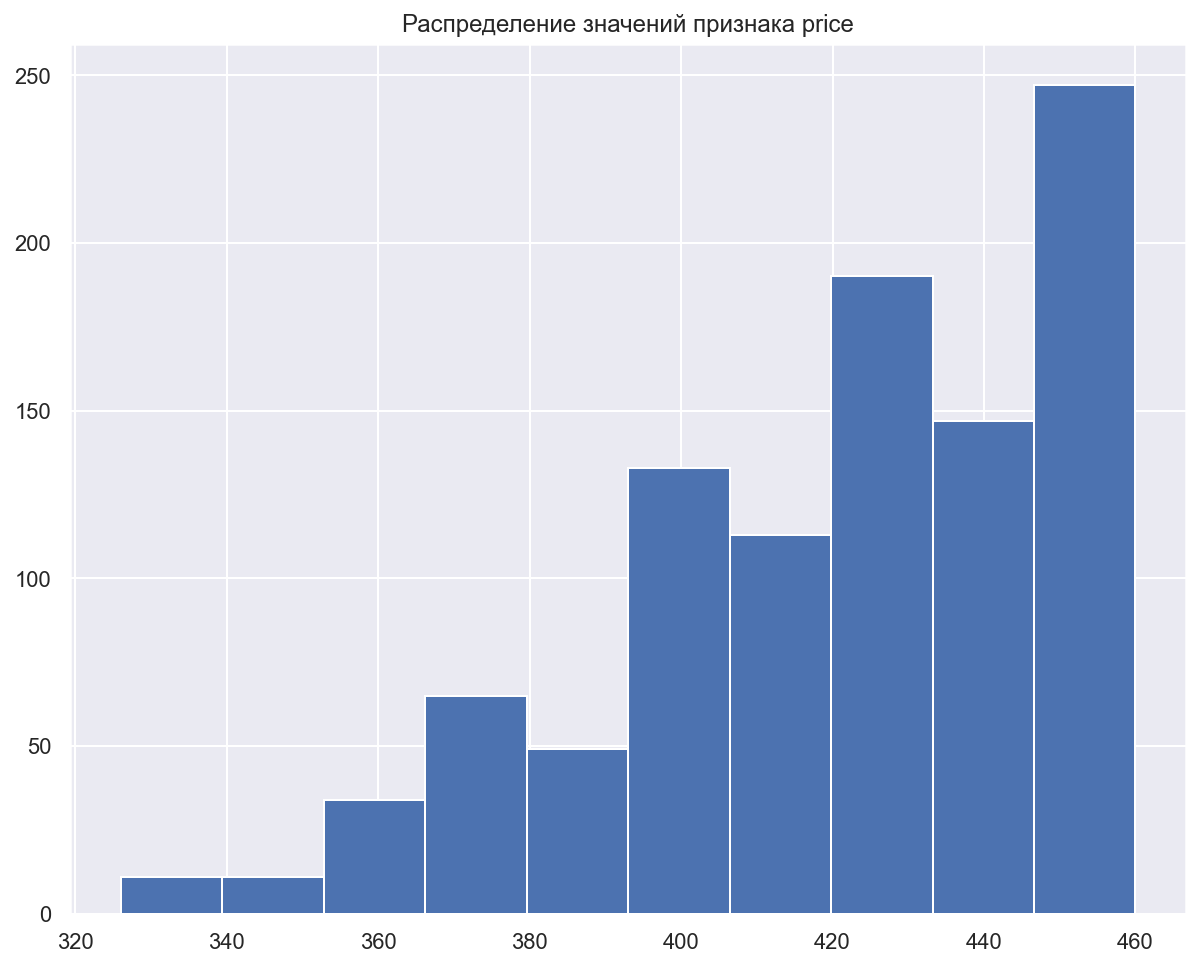

In [3]:
plt.figure(figsize=(10, 8))
plt.title('Распределение значений признака price')
plt.hist(df['price'])
plt.show()

In [4]:
df['price'].mean()

419.293

In [5]:
def bootstap(data):
    samples = np.random.choice(data, size = (len(data), 5000))
    mean_samp = np.mean(samples, axis = 0)
    
    std_s = np.std(mean_samp)
    mean_s = np.mean(mean_samp)
    
    #pivotal
    lb = mean_s - 1.96 * std_s
    rb = mean_s + 1.96 * std_s
    
    #non-pivotal
    smr = sorted(mean_samp)
    lbn = smr[125]
    rbn = smr[4875]
    
    return mean_samp, lb, rb, lbn, rbn

417.4731660806196
421.11931711938047
417.487
421.116


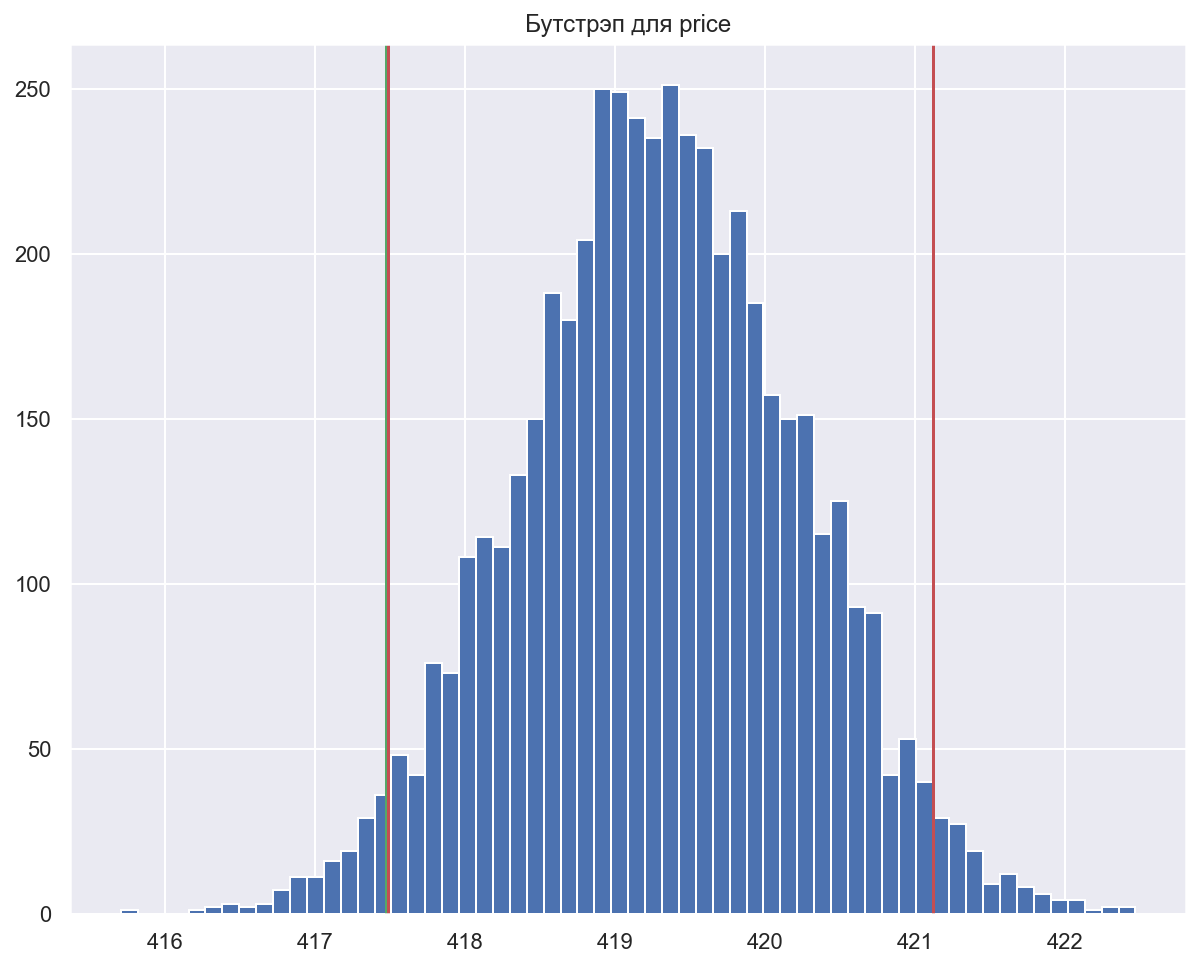

In [6]:
mean_samp, lb, rb, lbn, rbn = bootstap(df['price'])
print(lb)
print(rb)
print(lbn)
print(rbn)
plt.figure(figsize=(10, 8))
plt.title('Бутстрэп для price')
plt.hist(mean_samp, bins=60) 

plt.axvline(lb, c='g')
plt.axvline(rb, c='g')
plt.axvline(lbn, c='r')
plt.axvline(rbn, c='r')
plt.show()

376.72048063055024 381.8530151141306 376.6755319148936 381.8723404255319


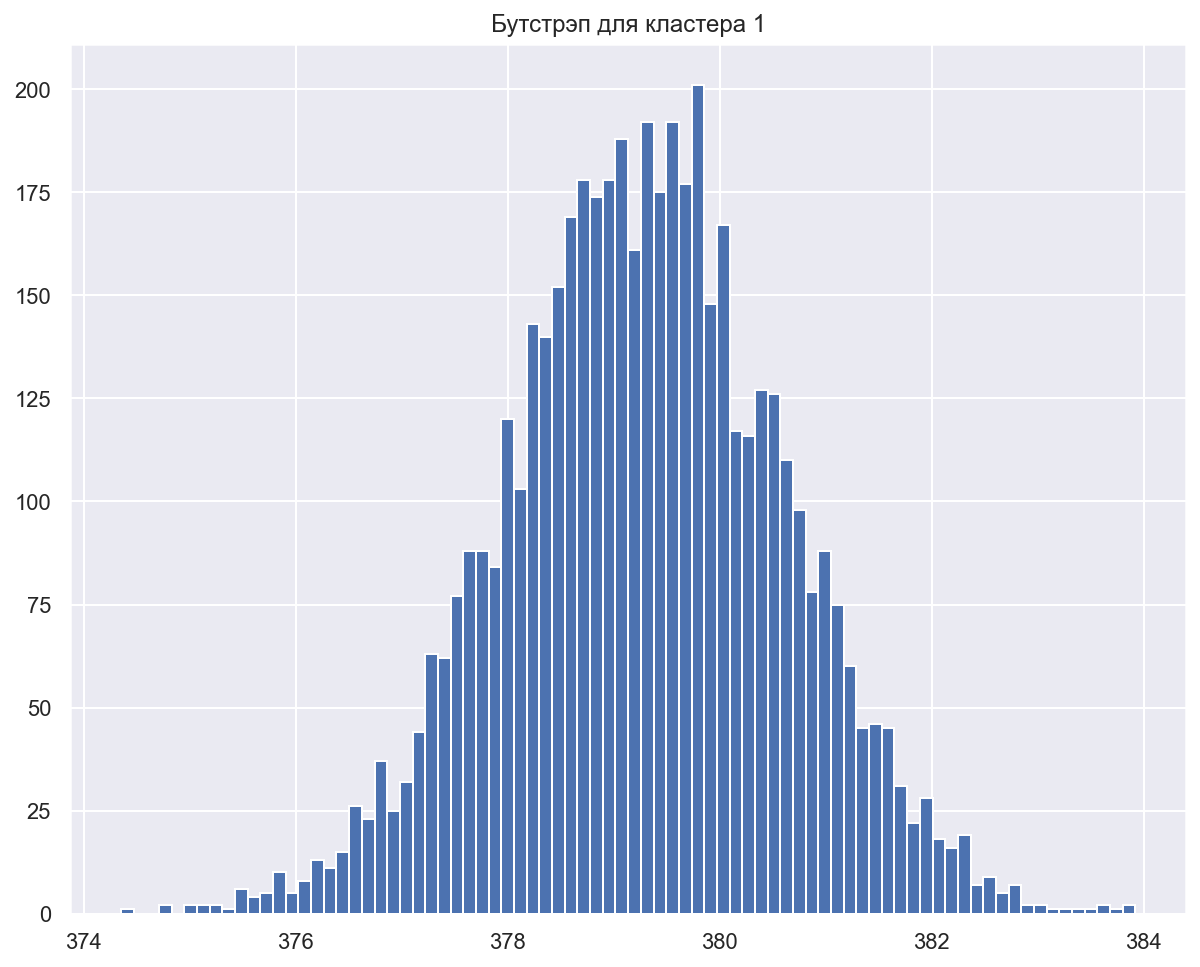

In [7]:
mean_samp_1, lb, rb, lbn, rbn = bootstap(df[df['label5'] == 1]['price'])
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.title('Бутстрэп для кластера 1')
plt.hist(mean_samp_1, bins = 80) 
plt.show()

428.26066519877287 433.1841429230546 428.2182741116751 433.1522842639594


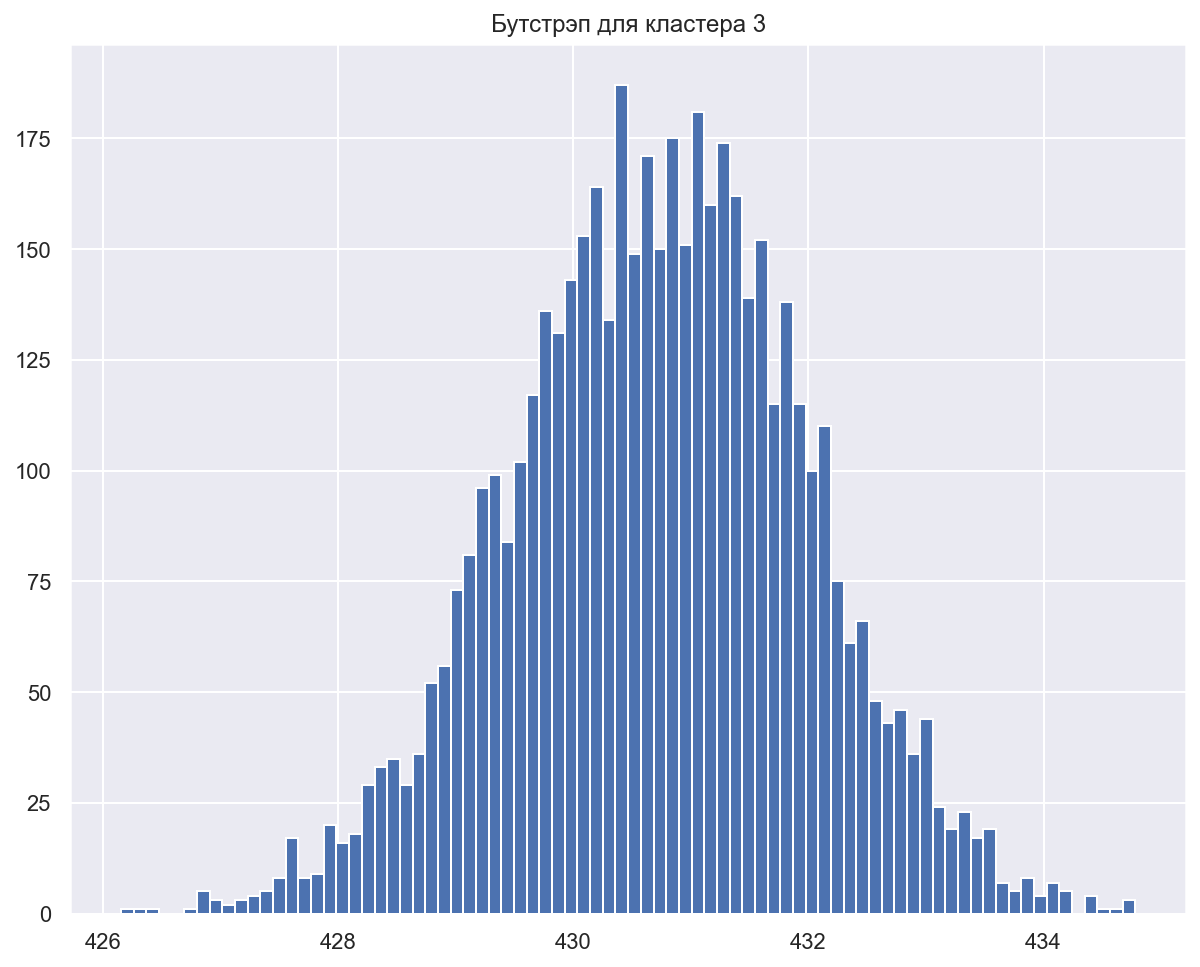

In [8]:
mean_samp_3, lb, rb, lbn, rbn = bootstap(df[df['label5'] == 3]['price'])
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.title('Бутстрэп для кластера 3')
plt.hist(mean_samp_3, bins = 80) 
plt.show()

51.38574523555337 51.48505413469596 51.38726568203909 51.48375089102487


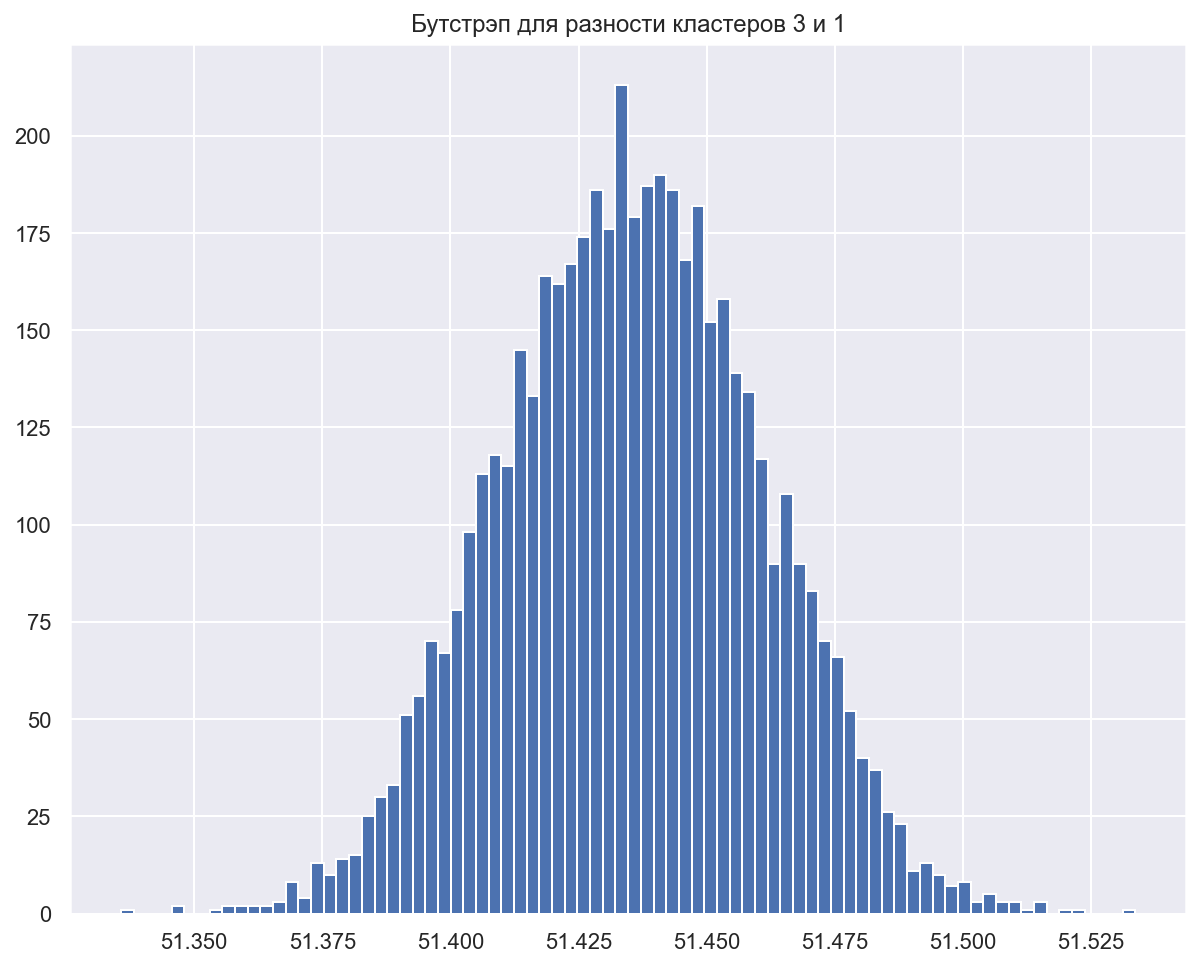

In [9]:
mean_diff, lb, rb, lbn, rbn = bootstap(mean_samp_3 - mean_samp_1)
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.title('Бутстрэп для разности кластеров 3 и 1')
plt.hist(mean_diff, bins = 80) 
plt.show()

39.9644066646422 40.054528294105054 39.964446425532 40.0548663872339


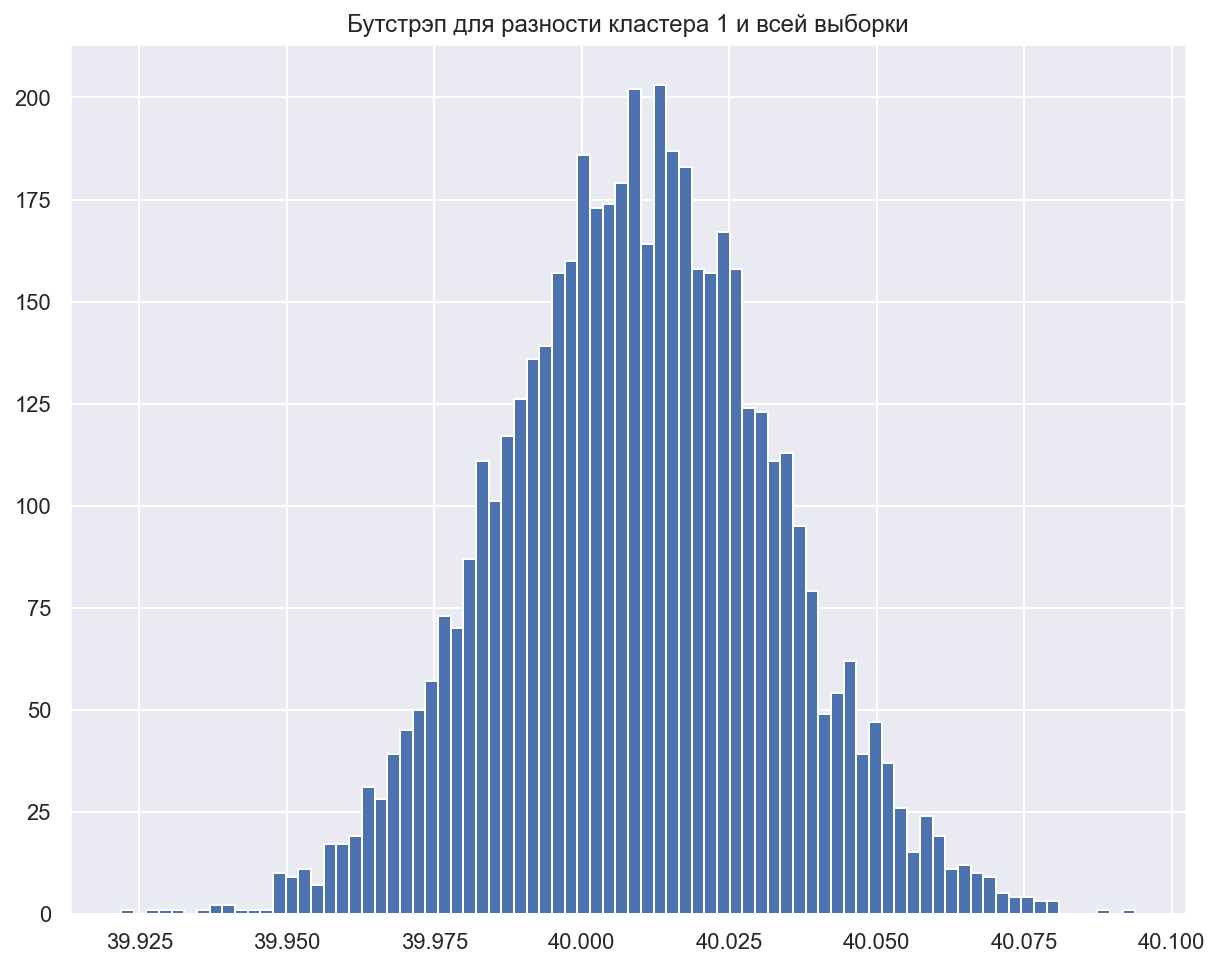

In [10]:
mean_diff, lb, rb, lbn, rbn = bootstap(mean_samp - mean_samp_1)
print(lb, rb, lbn, rbn)
plt.figure(figsize=(10, 8))
plt.title('Бутстрэп для разности кластера 1 и всей выборки')
plt.hist(mean_diff, bins = 80) 
plt.show()

In [11]:
std_s = np.std(mean_samp_3 - mean_samp_1)
mean_s = np.mean(mean_samp_3 - mean_samp_1)
    
#pivotal
# smb = np.std(mean_samp_1 - mean_samp_3)
lb = mean_s - 1.96 * std_s
rb = mean_s + 1.96 * std_s
    
    #non-pivotal
smr = sorted(mean_samp_3 - mean_samp_1)
lbn = smr[126]
rbn = smr[4875]

lb, rb, lbn, rbn

(47.887593227614396, 54.98371914953217, 47.88060265687443, 54.98166648666165)

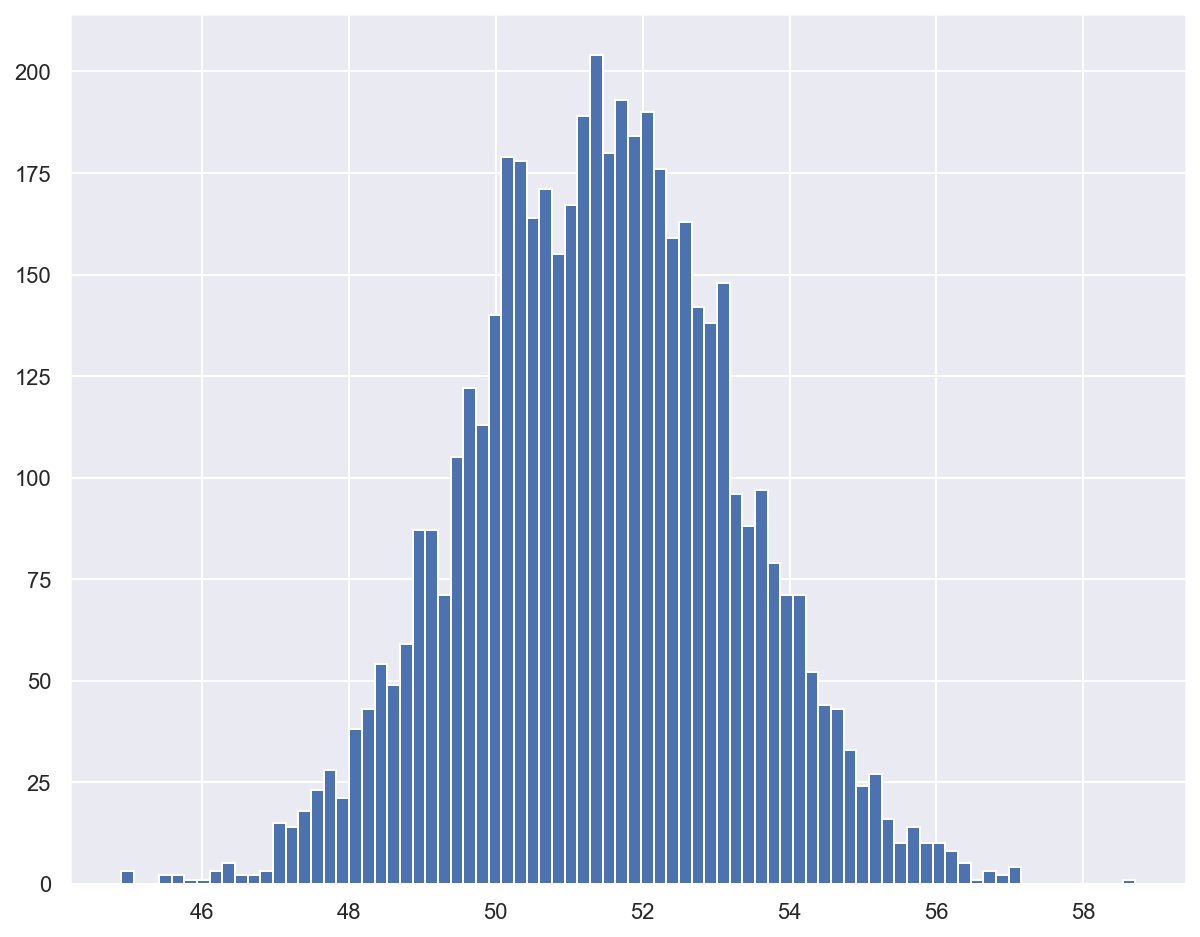

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(mean_samp_3 - mean_samp_1, bins=80);

In [13]:
std_s = np.std(mean_samp - mean_samp_1)
mean_s = np.mean(mean_samp - mean_samp_1)
    
    #pivotal
smb = np.std(mean_samp - mean_samp_1)
lb = mean_s - 1.96 * std_s
rb = mean_s + 1.96 * std_s
    
    #non-pivotal
smr = sorted(mean_samp - mean_samp_1)
lbn = smr[126]
rbn = smr[4875]

lb, rb, lbn, rbn

(36.87601696731498, 43.14297048800417, 36.953404255319185, 43.194468085106394)

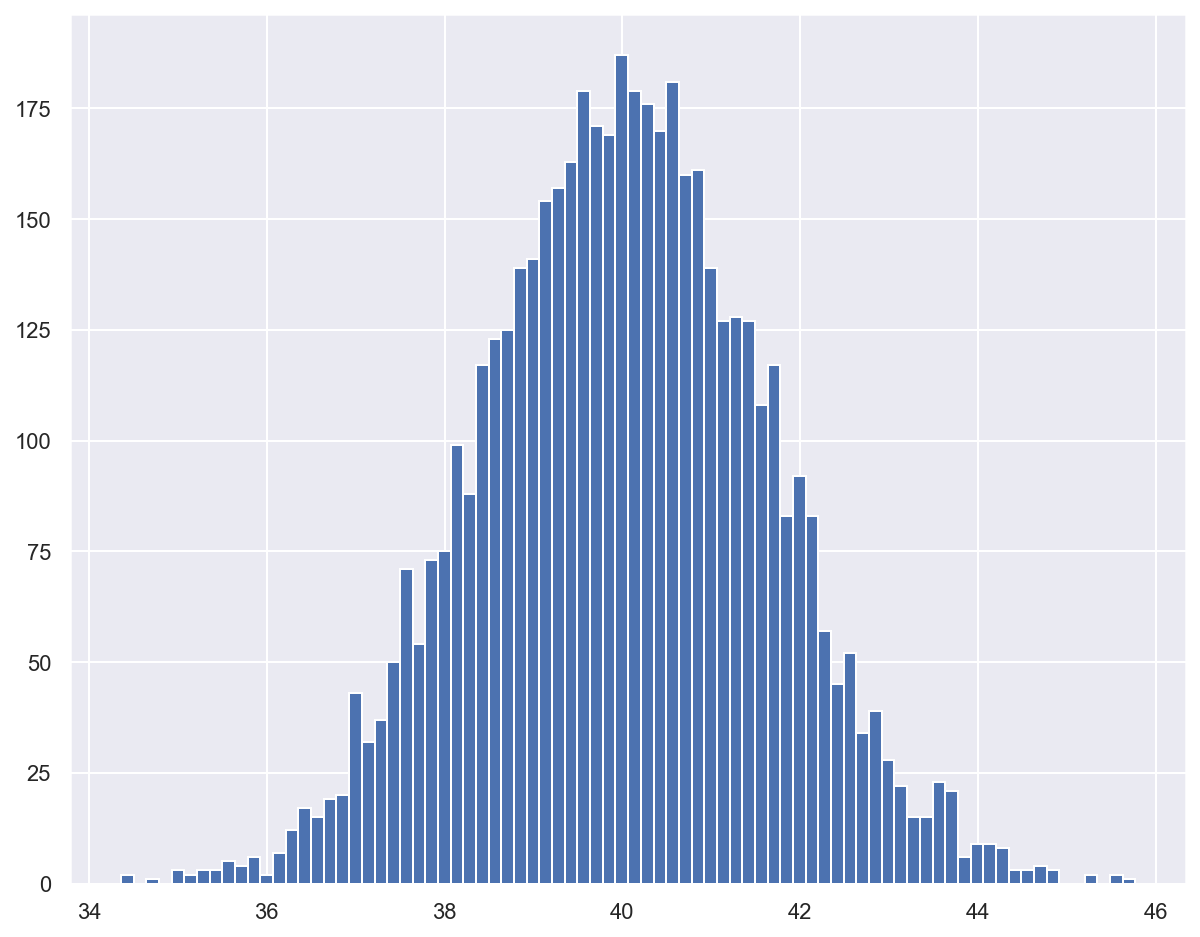

In [14]:
plt.figure(figsize=(10, 8))
plt.hist(mean_samp - mean_samp_1, bins=80);